# Week 13 - Bivariate Analysis 2 - Statistics

# 

## <font color='plum'> ANSWERS IN THIS COLOR

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency

# 1. Lesson

We are going to consider some statistical tests that you can apply to your data.

### T-tests

You can use a t-test to discern whether the means of two sets of numbers might be the same.  The t-test is useful for data that are normally distributed.  The data should also have approximately equal variances.  Of course you can run a t-test for data that don't fit these criteria, but the less well it fits, the more likely that the t-test will give the wrong result.

First, here is a one-sample t-test to see if you have made a correct guess about the underlying mean:

In [121]:
from scipy import stats
import numpy as np

np.random.seed(0)
arr1 = np.random.normal(loc = 0, size = 1000)
t_stat, p_value = stats.ttest_1samp(arr1, 0)
# The array might have a mean of 0; p > 0.05.  In fact, it does have a mean of 0.
print(p_value)

0.14759031545459375


In [122]:
# The array probably does not have a mean of 0.1; p < 0.05.  In fact, it doesn't.
t_stat, p_value = stats.ttest_1samp(arr1, 0.1)
print(p_value)

3.738968246353364e-06


In [123]:
arr2 = np.random.normal(loc = 0, size = 10)
t_stat, p_value = stats.ttest_1samp(arr2, 0.1)
# This array might have a mean of 0.1; p > 0.05.  In fact, it doesn't - but since there are only ten samples, we can't tell that
print(p_value)

0.8283790364046457


In [124]:
arr3 = np.random.normal(loc = 0.1, size = 1000)
t_stat, p_value = stats.ttest_ind(arr1, arr3)
# The two arrays probably have different means; p < 0.05.  In fact, they do have different means; 0 and 0.1
print(p_value)

0.0004525039970281393


### Mann-Whitney U-test

This test is used to determine whether two sets of numbers might come from the same distribution - but without making any assumptions about the data being normally distributed.

In [125]:
u_value, p_value = stats.mannwhitneyu(arr1, arr3)
# The two arrays probably come from different distributions.  In fact, they do; one comes from mean = 0, one mean = 1.
print(p_value)

0.0006158714688322861


In [126]:
np.random.seed(0)
arr4 = np.concatenate([np.zeros(10) + 0.01, np.array([1])])
arr5 = np.concatenate([np.zeros(10) - 0.01, np.array([-1])])
t_stat, p_value = stats.ttest_ind(arr4, arr5)
# Here is an example where the t-test fails due to the non-normality of the data.  The data do come from different 
# distributions with different means, but the t-test fails to detect it.
print(p_value)

0.13178840154670063


In [127]:
u_value, p_value = stats.mannwhitneyu(arr4, arr5)
# The two arrays probably come from different distributions.  In fact, they do; see above.
# It is unusual for the t-test to fail due to non-normality but the Mann-Whitney U-test to succeed, but it can happen as in this case.
print(p_value)

1.2550539978736682e-05


### ANOVA: categorical data plotted vs. continous data

ANOVA is a t-test generalized to more than two groups

In [128]:
np.random.seed(0)
arr6 = np.random.normal(loc = 0, size = 1000)
arr7 = np.random.normal(loc = 0.1, size = 1000)
arr8 = np.random.normal(loc = 0.2, size = 1000)
result = stats.f_oneway(arr1, arr3, arr6)
# The three arrays probably have different means; p < 0.05.  In fact, as you can see, they do have different means.
print(result.pvalue)

0.0002860198265883102


### Chi-square: categorical data plotted vs. categorical data

Chi-square will test for statistical independence between counts for two categorical features.  To do this, it requires a matrix of numbers: one feature corresponds to the row and one to the column.  The numbers must be counts.  Thus, if the category for the column is weather (cloudy or sunny) and the category for the row is temperature (low, medium, or high), then the count of days in the month at that temperature and weather would be a good variable for chi-square.

In [129]:
arr9 = np.array([[10, 0], [5, 5], [0, 10]])
result = stats.chi2_contingency(arr9)
# Different rows are very different.  Each row is _not_ a fixed multiple of each other, so the variables are not independent.
# Thus, the chi-squared test shows that the data are not independent.  
# In the next example, we will elaborate on what kind of difference is involved
print(result.pvalue)

4.539992976248486e-05


The specific goal of the chi-squared contingency table test is to find out whether the table possesses statistical independence - which is to say, it asks whether each number can be written as a product of two other numbers: one for its row and one for its column.  For example, suppose two stores, A and B, sell two kinds of apples, red and green.  If the number of apples sold is independent, it would mean that we can multiply to get the number sold.  That is, the fraction of the apples that are red and sold at store A would approximately equal the fraction red multiplied by the fraction sold at store A.

In [130]:
A_B_values = np.array([0.4, 0.6])
red_green_values = np.array([0.7, 0.3])
outer_product = 50 * np.outer(A_B_values, red_green_values)
print(outer_product)

[[14.  6.]
 [21.  9.]]


The chi-squared test returns a null result due to the complete independence of the values.  (p > 0.05).  Each row is precisely a fixed multiple of the other.  As above, a low p-value means dependence and a high p-value means independence.

In [131]:
result = stats.chi2_contingency(outer_product)
print(result.pvalue)

1.0


In [132]:
arr9 = np.array([[10, 0], [9, 1], [8, 2]])
result = stats.chi2_contingency(arr9)
# Here, the first columns (10, 9, 8) is quite different in its ratios compared with the second (0, 1, 2)
# However, because the second column has low counts, it is conceivable that these ratios could not be the true ratios.
# This means that perhaps the variables are independent after all, leading to a relatively high p-value - we cannot say for
# sure that the data are not independent.  We'd need more data to say that.
print(result.pvalue)

0.3291929878079055


In [133]:
result = stats.chi2_contingency(arr9 * 3)
# If we have a lot more data, even with the exact same ratios between the rows, we become more certain that the data are not independent
print(arr9 * 3)
print(result.pvalue)

[[30  0]
 [27  3]
 [24  6]]
0.0356739933472524


# 2. Weekly graph question

Which of the following graph color schemes would you choose, and why?

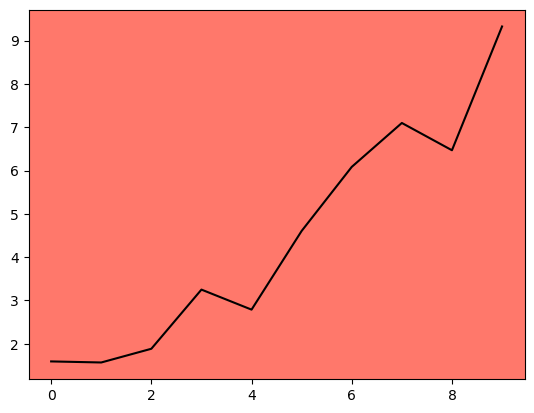

In [134]:
import matplotlib.pyplot as plt
arr10 = np.arange(10)
arr11 = np.random.normal(size = 10) + np.arange(10)
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1.0, 0.47, 0.42))

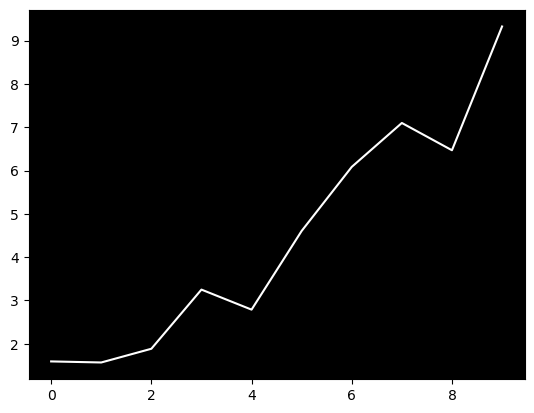

In [135]:
fig = plt.plot(arr10, arr11, c = "white")
ax = plt.gca()
ax.set_facecolor((0, 0, 0))

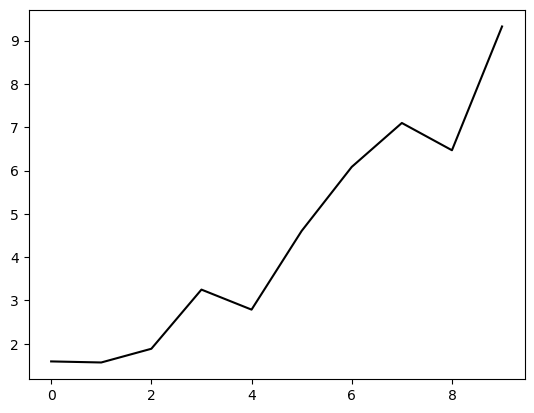

In [136]:
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1, 1, 1))

<font color='plum'> I would choose the last plot. Simple, easy to implement, no cognitive overload.

# 3. Homework

* Create a dataset showing flowers that have been fertilized with two brands of fertilizer.  The data show the heights of the flowers.  One fertilizer is better than the other, leading to taller flowers - but only slightly taller.

* The flowers have some height distribution that is _not_ normal.

* Use a *t-test* and a *Mann-Whitney U test* to determine whether the flowers have the same height.  (In this case, try the t-test even though the distribution it not normal.  However, that is not always a good idea!)

In [137]:


np.random.seed(42)
sample_size = 1000

#  non-normal distributions using exponential distribution

fertilizer_A = np.random.exponential(scale=5.0, size=sample_size)
fertilizer_B = np.random.exponential(scale=5.2, size=sample_size)  # Slightly higher mean

data_1 = [fertilizer_A, fertilizer_B]

t_stat, p_val_t = stats.ttest_ind(data_1[0], data_1[1])
u_stat, p_val_u = stats.mannwhitneyu(data_1[0], data_1[1])

# Print results
print('Dataset 1\n')
print(f"T-stat: {t_stat}\np-value: {p_val_t:.4f}\n")
print(f"Mann-Whitney U test stat: {u_stat}\np-value: {p_val_u:.4f}\n")
print(f"T-test result: {'SIGNIFICANT' if p_val_t < 0.05 else 'NOT SIGNIFICANT'}")


Dataset 1

T-stat: -2.25229731520528
p-value: 0.0244

Mann-Whitney U test stat: 473898.0
p-value: 0.0432

T-test result: SIGNIFICANT


<font color='plum'> Both t-test and Mann-Whitney show p-val < 0.05, meaning both tests recognize the difference in mean heights of the flowers as statisticially significantly different; therefore, Fertilizer B produces taller flowers than Fertilizer_A. 

* Actually, create two datasets: one where the t-test works (and detects the slight height difference) and one where the t-test fails.


* Draw a box and whisker plot or histogram showing the distribution of the flower heights in each case.  Can you see the difference?

In [138]:
# Dataset 2: Fat-tailed distribution (Student's t-distribution) - T-test FAILS

# fat-tailed distributions using t-distribution with low degrees of freedom
# Add the same mean difference as before
fertilizer_A_fat = np.random.standard_t(df=3, size=sample_size) * 2 + 10.0
fertilizer_B_fat = np.random.standard_t(df=3, size=sample_size) * 2 + 10.2  # Same 0.2 difference

# Statistical tests
t_stat_fat, p_val_t_fat = stats.ttest_ind(fertilizer_A_fat, fertilizer_B_fat)
u_stat_fat, p_val_u_fat = stats.mannwhitneyu(fertilizer_A_fat, fertilizer_B_fat, alternative='two-sided')

print(f"Fertilizer A mean: {np.mean(fertilizer_A_fat):.2f}")
print(f"Fertilizer B mean: {np.mean(fertilizer_B_fat):.2f}")
print(f"True difference: {np.mean(fertilizer_B_fat) - np.mean(fertilizer_A_fat):.2f}")
print(f"\nT-test: t={t_stat_fat:.3f}, p={p_val_t_fat:.4f}")
print(f"Mann-Whitney U: U={u_stat_fat}, p={p_val_u_fat:.4f}")
print(f"\nT-test result: {'SIGNIFICANT' if p_val_t_fat < 0.05 else 'NOT SIGNIFICANT'}")

Fertilizer A mean: 9.96
Fertilizer B mean: 10.06
True difference: 0.10

T-test: t=-0.667, p=0.5047
Mann-Whitney U: U=490139.0, p=0.4451

T-test result: NOT SIGNIFICANT


In [139]:

print("Dataset 1 (t-test DETECTS difference):")
print(f"T-test p-value: {p_val_t:.4f}")
print(f"Mann-Whitney U test p-value: {p_val_u:.4f}\n")

print("Dataset 2 (t-test FAILS to DETECT difference):")
print(f"T-test p-value: {p_val_t_fat:.4f}")
print(f"Mann-Whitney U test p-value: {p_val_u_fat:.4f}")


Dataset 1 (t-test DETECTS difference):
T-test p-value: 0.0244
Mann-Whitney U test p-value: 0.0432

Dataset 2 (t-test FAILS to DETECT difference):
T-test p-value: 0.5047
Mann-Whitney U test p-value: 0.4451


<font color='plum'> CONCLUSION: a t-distribution with fatter tails and lower degree of freedom will produce more outliers, which will inflate variance estimates and reduce the t-test's power

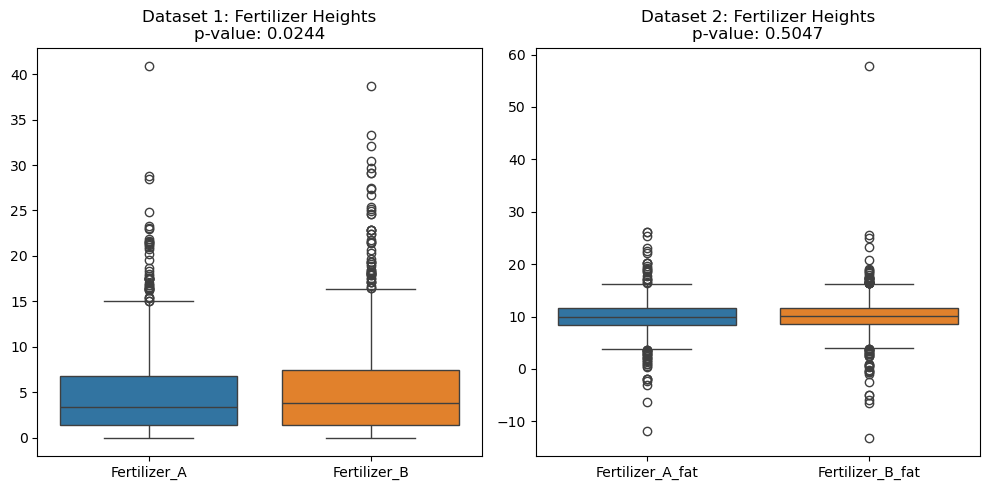

In [140]:

#  boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=[fertilizer_A, fertilizer_B])
plt.xticks([0, 1], ['Fertilizer_A', 'Fertilizer_B'])
plt.title(f'Dataset 1: Fertilizer Heights\np-value: {p_val_t:.4f}')

plt.subplot(1, 2, 2)
sns.boxplot(data=[fertilizer_A_fat, fertilizer_B_fat])
plt.xticks([0, 1], ['Fertilizer_A_fat', 'Fertilizer_B_fat'])
plt.title(f'Dataset 2: Fertilizer Heights\np-value: {p_val_t_fat:.4f}')

plt.tight_layout()
plt.show()

# The code above generates two datasets of fertilizer heights, one where the t-test detects a difference and one where it does not.


* Next, create a dataset showing five different brands of fertilizer, leading to five somewhat different height distributions.  Use an ANOVA test to detect the height differences.  Does the ANOVA test work?

In [152]:
np.random.seed(42)
sample_size = 30
#  non-normal flower height data for five fertilizer brands
fertilizer_A = np.random.exponential(scale=5.0, size=sample_size)
fertilizer_B = np.random.exponential(scale=5.2, size=sample_size)
fertilizer_C = np.random.exponential(scale=5.4, size=sample_size)
fertilizer_D = np.random.exponential(scale=5.6, size=sample_size)
fertilizer_E = np.random.exponential(scale=5.8, size=sample_size)


anova_result = f_oneway(fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D, fertilizer_E)
anova_result_stat = {
    "ANOVA F-statistic": anova_result.statistic,
    "ANOVA p-value": anova_result.pvalue
}
anova_result_stat

{'ANOVA F-statistic': 0.4152292973060526, 'ANOVA p-value': 0.7974604783103773}

<font color='plum'> In this ANOVA test, the p-value is very high (> 0.05), so we fail to reject the null hypothesis.
This suggests that the differences in mean flower heights across the five fertilizer brands are not statistically significant.


* Finally, create a dataset showing the heights of four different flower types for each of the five brand of fertilizers (one height for each pair, so 4 x 5 = 20 heights).  Use a chi squared test to check whether the five different fertilizers lead to different flower heights.

In [153]:

from scipy.stats import f_oneway, chi2_contingency

# Create a dataset showing heights of four different flower types for each of the five fertilizer brands
flower_types        = ['Rose', 'Tulip', 'Lily', 'Daisy']
fertilizer_brands   = ['A', 'B', 'C', 'D', 'E']

# Generate height data (one height for each flower type and fertilizer brand pair)
height_data = np.random.exponential(scale = 5.0, size = (len(flower_types), len(fertilizer_brands)))

# Convert to DataFrame for chi-squared test
height_df = pd.DataFrame(height_data, index = flower_types, columns = fertilizer_brands)

# Perform chi-squared test
chi2_result = chi2_contingency(height_df)



chi2_result_stat = {
    "Chi-squared statistic": chi2_result[0],
    "Chi-squared p-value": chi2_result[1],
    "Degrees of freedom": chi2_result[2]
}

anova_result_stat, chi2_result_stat


({'ANOVA F-statistic': 0.4152292973060526,
  'ANOVA p-value': 0.7974604783103773},
 {'Chi-squared statistic': 44.299588974811286,
  'Chi-squared p-value': 1.3577078711174996e-05,
  'Degrees of freedom': 12})

<font color='plum'> The p-value is very low (< 0.001), so we reject the null hypothesis.
This suggests that flower height distributions differ significantly across fertilizer brands.
However, the chi-squared test assumes categorical data or frequency counts, not continuous values like height. So this test is not appropriate for continuous measurements unless the data is binned into categories (e.g., short, medium, tall).

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter nine, stopping before case study 4 (p. 206-227) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

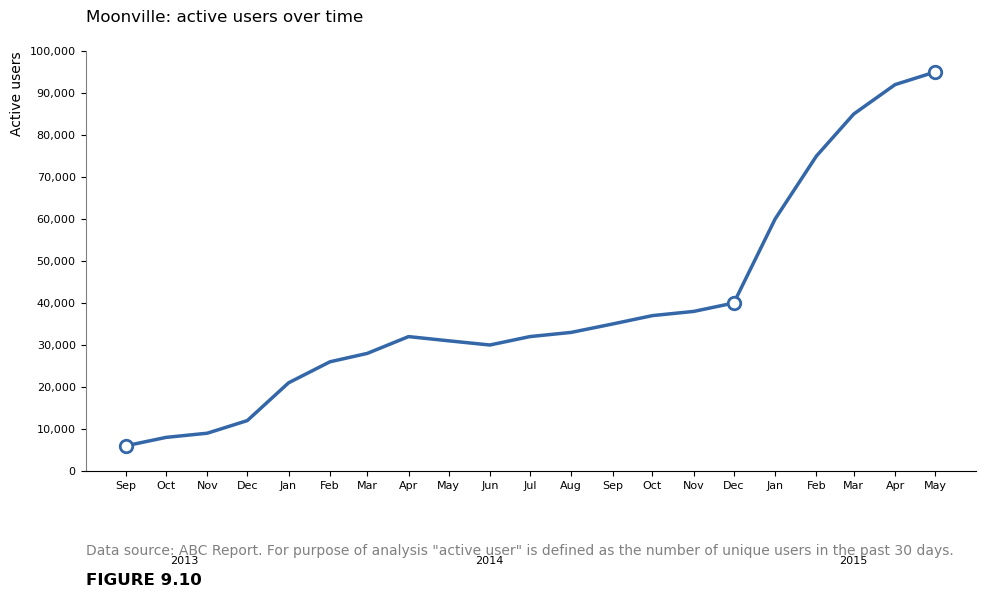

In [144]:

import matplotlib.dates as mdates
import matplotlib.ticker as mticker


# --- Data Preparation ---
# Define the dates and estimated active user counts based on the plot
dates = pd.to_datetime([
    '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
    '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
    '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
    '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
    '2015-05-01'
])

users = [
    6000, 8000, 9000, 12000, 21000, 26000, 28000, 32000, 31000, 30000,
    32000, 33000, 35000, 37000, 38000, 40000, 60000, 75000, 85000,
    92000, 95000
]

# Data for the specific highlighted markers
marker_dates = pd.to_datetime(['2013-09-01', '2014-12-01', '2015-05-01'])
marker_users = [6000, 40000, 95000]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the main line
ax.plot(dates, users, color='#3467A8', linewidth=2.5)

# Plot the highlighted hollow circle markers
ax.plot(marker_dates, marker_users,
        marker='o',
        markersize=9,
        markerfacecolor='white',
        markeredgecolor='#3467A8',
        markeredgewidth=2,
        linestyle='None')

# --- Formatting ---
# Set titles and labels
ax.set_title('Moonville: active users over time', loc='left', fontsize=12, y=1.05)
ax.set_ylabel('Active users', fontsize=10, loc='top')

# Format Y-axis
ax.set_ylim(0, 100000)
ax.set_yticks(np.arange(0, 100001, 10000))
ax.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis='y', labelsize=8)


# Format X-axis
# Set monthly ticks and format them as abbreviated month names
ax.set_xticks(dates)
ax.set_xticklabels([d.strftime('%b') for d in dates], fontsize=8)


# ax.set_xlabel('')
# ax.tick_params(axis='x', length=2, labelsize=8)

# Add year annotations below the x-axis
ax.text(pd.Timestamp('2013-10-15'), -22000, '2013', ha='center', fontsize=8)
ax.text(pd.Timestamp('2014-06-01'), -22000, '2014', ha='center', fontsize=8)
ax.text(pd.Timestamp('2015-03-01'), -22000, '2015', ha='center', fontsize=8)


# Remove top, right, and bottom spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)

ax.spines['left'].set_color('gray')


#  annotations below the plot
plt.figtext(0.09, 0.06,
            'Data source: ABC Report. For purpose of analysis "active user" is defined as the number of unique users in the past 30 days.',
            wrap=True, ha='left', fontsize=10, color='gray')
plt.figtext(0.09, 0.01, 'FIGURE 9.10', ha='left', fontsize=12, weight='bold')


# Adjust layout to prevent labels from overlapping
plt.subplots_adjust(left=0.09, right=0.98, top=0.9, bottom=0.2)
plt.show()